Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/10, moves: 9, cost: 468.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/10, moves: 13, cost: 468.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/10, moves: 18, cost: 468.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/10, moves: 14, cost: 473.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/10, moves: 13, cost: 477.0
Run 5, iteration: 2/10, moves: 1, cost: 477.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/10, moves: 17, cost: 454.0
Run 6, iteration: 2/10, moves: 3, cost: 454.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/10, moves: 22, cost: 468.0
Run 7, iteration: 2/

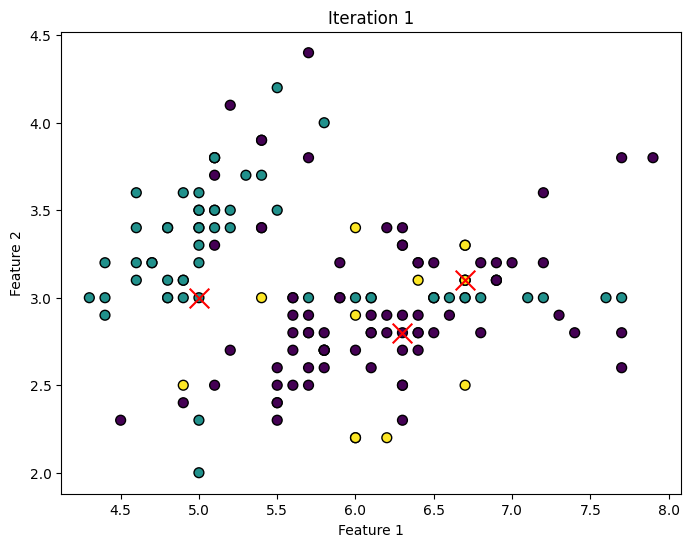

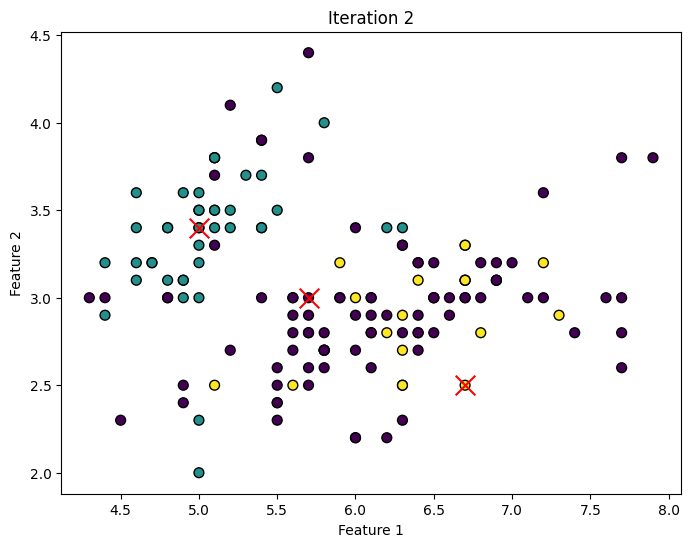

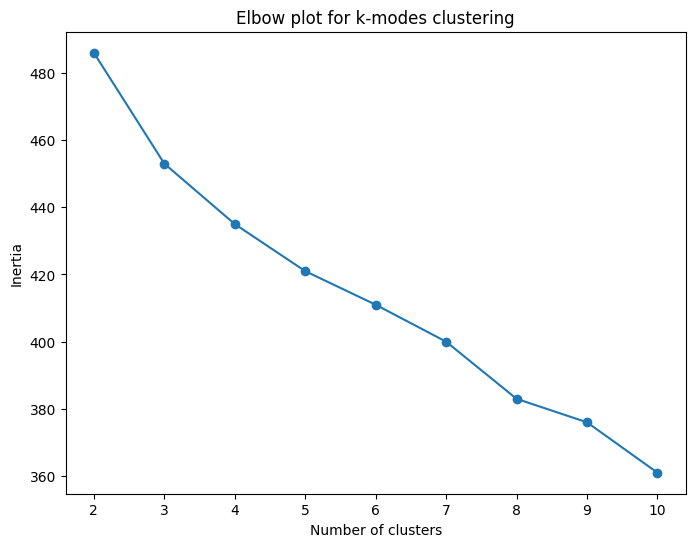

In [7]:
# Install the kmodes library
!pip install kmodes

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Convert data to DataFrame for easier manipulation
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y

# Encode categorical data
label_encoder = LabelEncoder()
for column in df.columns[:-1]:
    df[column] = label_encoder.fit_transform(df[column])

# Function to run k-modes clustering and plot iterations
def run_kmodes(X, n_clusters, n_init=10, max_iter=10):
    k_modes = KModes(n_clusters=n_clusters, init='Huang', n_init=n_init, max_iter=max_iter, verbose=1)
    k_modes.fit(X)
    centroids = k_modes.cluster_centroids_
    labels = k_modes.labels_

    for iteration in range(k_modes.n_iter_):
        plt.figure(figsize=(8, 6))
        plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)
        plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='x')
        plt.title(f'Iteration {iteration+1}')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.show()

        # Update centroids for next iteration
        k_modes = KModes(n_clusters=n_clusters, init='Huang', n_init=n_init, max_iter=1, verbose=0)
        k_modes.fit(X)
        centroids = k_modes.cluster_centroids_
        labels = k_modes.labels_

    return k_modes

# Run k-modes clustering and show iterations
n_clusters = 3
km = run_kmodes(X, n_clusters)

# Elbow plot to find the optimal number of clusters
inertia = []
for k in range(2, 11):
    km = KModes(n_clusters=k, init='Huang', n_init=10, max_iter=10, verbose=0)
    km.fit(X)
    inertia.append(km.cost_)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow plot for k-modes clustering')
plt.show()
